<a href="https://colab.research.google.com/github/ctshiz/WORKSPACE_STOCK_MARKET_PREDICTION/blob/main/Trading_strategies_with_Relative_Strength_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Step 1: Determine the installed version of module pandas_datareader
!pip show pandas_datareader
#Step 2: if the version is lower than 0.10.0 then upgrade the version.
!pip install --upgrade pandas_datareader
#Step 3: Don't forget to restart the runtime to load the new libraries.
#Press Runtime->Restart runtime

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: lxml, pandas, requests
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
#Step 4: Now try running the step 1 again to determine if the newest version is installed.
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, lxml, pandas
Required-by: 


In [35]:
#step 5: importing packages
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
import seaborn
from datetime import datetime
import pandas_datareader.data as web

In [36]:
#Step-6: Extracting Data from Yahoo Finance
# Now let's define a range, that means, from when until when we want the data:
start_date= datetime(2020, 1, 1) # the format is YYYY-MM-DD
end_date= datetime(2022, 11, 9)
# We will use data from Google and Microsoft in our analysis
banco_brasil= web.DataReader("BBAS3.SA", 'yahoo', start_date, end_date)
banco_brasil = banco_brasil.reset_index()
banco_brasil

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,53.970001,53.169998,53.349998,53.799999,13159900.0,45.301117
1,2020-01-03,53.910000,52.849998,53.099998,53.709999,9465400.0,45.225342
2,2020-01-06,53.400002,52.450001,53.400002,53.000000,9999900.0,44.627499
3,2020-01-07,53.029999,52.290001,53.000000,52.599998,10638500.0,44.290691
4,2020-01-08,52.990002,52.040001,52.759998,52.119999,21468600.0,43.886513
...,...,...,...,...,...,...,...
705,2022-11-03,39.029999,37.200001,39.000000,38.689999,30417900.0,38.502914
706,2022-11-04,39.980000,38.810001,38.959999,39.259998,27290400.0,39.070160
707,2022-11-07,39.189999,37.619999,38.910000,37.889999,23671200.0,37.706783
708,2022-11-08,38.299999,37.320000,37.779999,38.070000,14742300.0,37.885914


In [37]:
#step 7: RSI calculation
def get_rsi(close, lookback):
  ret = close.diff()
  up = []
  down = []
  for i in range(len(ret)):
    if ret[i] < 0:
      up.append(0)
      down.append(ret[i])
    else:
      up.append(ret[i])
      down.append(0)
  up_series = pd.Series(up)
  down_series = pd.Series(down).abs()
  up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
  down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
  rs = up_ewm / down_ewm
  rsi = 100 - (100 /(1 + rs))
  rsi_df = pd.DataFrame(rsi).rename(columns={0:'RSI'}).set_index(close.index)
  rsi_df = rsi_df.dropna()
  return rsi_df[3:]

In [38]:
banco_brasil['rsi_14'] = get_rsi(banco_brasil['Close'], 14)
banco_brasil = banco_brasil.dropna()
banco_brasil

,Date,High,Low,Open,Close,Volume,Adj Close,rsi_14
4,2020-01-08,52.990002,52.040001,52.759998,52.119999,21468600.0,43.886513,0.000000
5,2020-01-09,52.330002,50.730000,52.200001,51.060001,24743000.0,42.993965,0.000000
6,2020-01-10,51.439999,49.560001,51.160000,49.860001,15348200.0,41.983532,0.000000
7,2020-01-13,50.500000,49.610001,49.980000,50.419998,14181900.0,42.455063,14.668015
8,2020-01-14,50.490002,49.750000,50.279999,50.150002,8765000.0,42.227722,13.629954
...,...,...,...,...,...,...,...,...
705,2022-11-03,39.029999,37.200001,39.000000,38.689999,30417900.0,38.502914,46.439619
706,2022-11-04,39.980000,38.810001,38.959999,39.259998,27290400.0,39.070160,48.651089
707,2022-11-07,39.189999,37.619999,38.910000,37.889999,23671200.0,37.706783,43.953634
708,2022-11-08,38.299999,37.320000,37.779999,38.070000,14742300.0,37.885914,44.709008


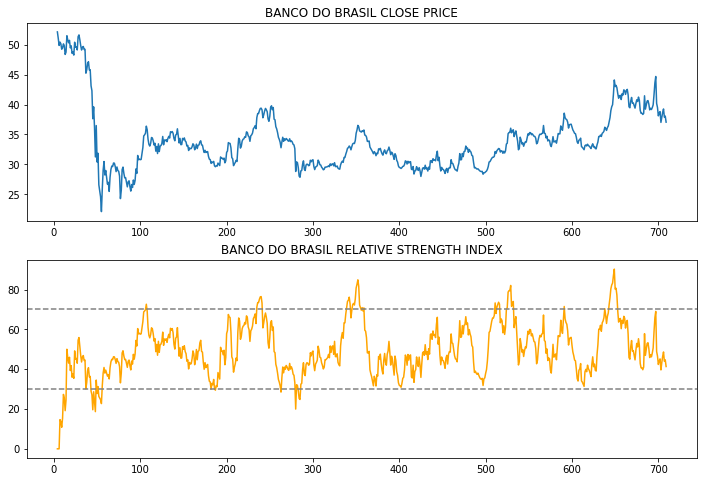

In [52]:
#step 8: rsi plot
fig,axs=plt.subplots(2, figsize=(12,8))
axs[0].plot(banco_brasil['Close'],linewidth=1.5)
axs[0].set_title('BANCO DO BRASIL CLOSE PRICE')
axs[1].plot(banco_brasil['rsi_14'],linewidth=1.5, color='orange')
axs[1].axhline(30, linestyle ='--',linewidth=1.5, color='grey')
axs[1].axhline(70, linestyle ='--',linewidth=1.5, color='grey')
axs[1].set_title('BANCO DO BRASIL RELATIVE STRENGTH INDEX')
plt.show()

In [48]:
#step 9: creating the trading strategy
def implement_rsi_strategy(prices, rsi):
  buy_price = []
  sell_price = []
  rsi_signal = []
  signal = 0

  for i in range(len(rsi)):
    if rsi[i-1] > 30 and rsi[i] < 30:
      if signal != 1:
        buy_price.append(prices[i])
        sell_price.append(np.nan)
        signal = 1
        rsi_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        rsi_signal.append(0)
    elif rsi[i-1] < 70 and rsi[i] > 70:
      if signal != -1:
        buy_price.append(np.nan)
        sell_price.append(prices[i])
        signal = -1
        rsi_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        rsi_signal.append(0)
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
      rsi_signal.append(0)
  return buy_price, sell_price, rsi_signal

rsi = banco_brasil['rsi_14'].to_list()
prices = banco_brasil['Close'].to_list()
buy_price, sell_price, rsi_signal = implement_rsi_strategy(prices,rsi)
      

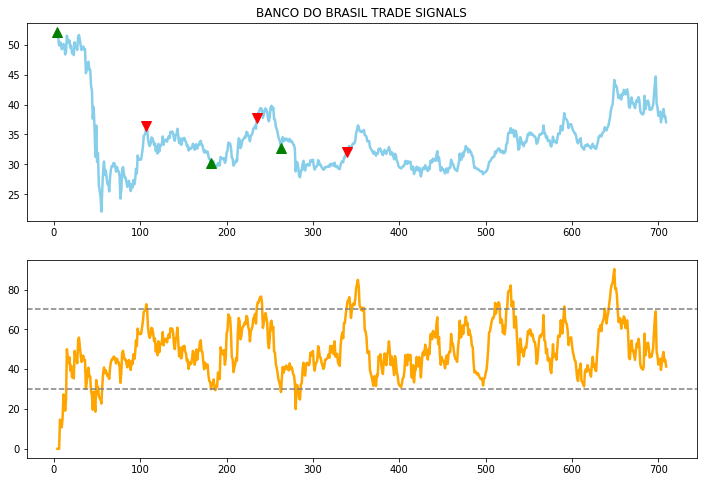

In [51]:
fig,axs=plt.subplots(2, figsize=(12,8))
axs[0].set_title('BANCO DO BRASIL TRADE SIGNALS')
axs[0].plot(banco_brasil['Close'],linewidth=2.5, color='skyblue',label='BANCO DO BRASIL')
axs[0].plot(banco_brasil.index, buy_price, marker='^', markersize=10,color='green',label='BUY SIGNAL')
axs[0].plot(banco_brasil.index, sell_price, marker='v', markersize=10,color='r',label='SELL SIGNAL')
axs[1].plot(banco_brasil['rsi_14'],linewidth=2.5, color='orange')
axs[1].axhline(30, linestyle ='--',linewidth=1.5, color='grey')
axs[1].axhline(70, linestyle ='--',linewidth=1.5, color='grey')
plt.show()
